# **Healthcare Analytics for Disease Prediction**

# Introduction
The objective of this project is to develop a machine learning model to predict the likelihood of Diabetes and Heart Disease based on patient data. The model aims to assist healthcare professionals in early diagnosis and intervention, ultimately improving patient outcomes and reducing healthcare costs.

# Creating Synthesized data inorder to work on Prediction Model

# Installing Libraries

In [36]:
!pip install shap
!pip install scikit-learn==1.2.2
!pip install pdpbox
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.6 MB/s eta 0:00:00


In [14]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define number of samples
num_samples = 1000

# Generate synthetic data
data = {
    'Patient_ID': np.arange(1, num_samples + 1),
    'Age': np.random.randint(18, 85, size=num_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=num_samples),
    'BMI': np.random.normal(25, 5, size=num_samples),
    'Blood_Pressure_Systolic': np.random.normal(120, 10, size=num_samples),
    'Blood_Pressure_Diastolic': np.random.normal(80, 5, size=num_samples),
    'Cholesterol_Level': np.random.normal(200, 30, size=num_samples),
    'Diabetes_Status': np.random.choice([0, 1], size=num_samples, p=[0.9, 0.1]),
    'Heart_Disease_Status': np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2]),
    'Smoking_Status': np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3])
}

# Create DataFrame
created_data = pd.DataFrame(data)

# Display the first few rows of the synthetic dataset
print(created_data.head())



   Patient_ID  Age  Gender        BMI  Blood_Pressure_Systolic  \
0           1   69    Male  30.540914               108.105881   
1           2   32  Female  19.800470               136.426730   
2           3   78  Female  28.063870               110.993793   
3           4   38  Female  19.732922               126.383919   
4           5   41    Male  21.881155               116.713815   

   Blood_Pressure_Diastolic  Cholesterol_Level  Diabetes_Status  \
0                 76.351988         198.120813                0   
1                 81.807087         207.293704                1   
2                 73.534292         191.172725                0   
3                 82.861952         240.697502                0   
4                 82.253017         193.989423                0   

   Heart_Disease_Status  Smoking_Status  
0                     0               1  
1                     0               1  
2                     0               0  
3                     0         

In [15]:
# Print columns of the DataFrame
print(created_data.columns)


Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Diabetes_Status',
       'Heart_Disease_Status', 'Smoking_Status'],
      dtype='object')


# Pre processing

In [16]:
# Check data types of each column
print(created_data.dtypes)




Patient_ID                    int64
Age                           int64
Gender                       object
BMI                         float64
Blood_Pressure_Systolic     float64
Blood_Pressure_Diastolic    float64
Cholesterol_Level           float64
Diabetes_Status               int64
Heart_Disease_Status          int64
Smoking_Status                int64
dtype: object


In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Preprocessing: Handling Missing Values
# Check for missing values
missing_values = created_data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# No missing values in this synthetic dataset, so no further action needed

# Preprocessing: Label Encoding for 'Gender' Column
label_encoder = LabelEncoder()
created_data['Gender'] = label_encoder.fit_transform(created_data['Gender'])

# Display the first few rows after label encoding
print("\nAfter Label Encoding:\n", created_data.head())

# Preprocessing: Normalizing Numerical Features
# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features (Age, BMI, Blood_Pressure_Systolic, Blood_Pressure_Diastolic, Cholesterol_Level)
numerical_features = ['Age', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level']
created_data[numerical_features] = scaler.fit_transform(created_data[numerical_features])

# Display the first few rows after normalization
print("\nAfter Normalization:\n", created_data.head())


Missing Values:
 Patient_ID                  0
Age                         0
Gender                      0
BMI                         0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Cholesterol_Level           0
Diabetes_Status             0
Heart_Disease_Status        0
Smoking_Status              0
BMI_Category_Underweight    0
dtype: int64

After Label Encoding:
    Patient_ID       Age  Gender       BMI  Blood_Pressure_Systolic  \
0           1  0.926840       1  1.071156                -1.211863   
1           2 -0.944644       0 -1.089664                 1.650700   
2           3  1.382066       0  0.572811                -0.919964   
3           4 -0.641160       0 -1.103253                 0.635611   
4           5 -0.489418       1 -0.671061                -0.341806   

   Blood_Pressure_Diastolic  Cholesterol_Level  Diabetes_Status  \
0                 -0.693649          -0.028002                0   
1                  0.373646           0.279780              

with using label encoder we encoded gender values into 0 and 1 inorder to continue with normalization

# Feature Engineering

In [22]:
# Feature Engineering
# Calculate BMI category based on BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

created_data['BMI_Category'] = created_data['BMI'].apply(categorize_bmi)

# Display the first few rows after feature engineering
print("\nAfter Feature Engineering:\n", created_data.head())


After Feature Engineering:
    Patient_ID       Age  Gender       BMI  Blood_Pressure_Systolic  \
0           1  0.926840       1  1.071156                -1.211863   
1           2 -0.944644       0 -1.089664                 1.650700   
2           3  1.382066       0  0.572811                -0.919964   
3           4 -0.641160       0 -1.103253                 0.635611   
4           5 -0.489418       1 -0.671061                -0.341806   

   Blood_Pressure_Diastolic  Cholesterol_Level  Diabetes_Status  \
0                 -0.693649          -0.028002                0   
1                  0.373646           0.279780                1   
2                 -1.244933          -0.261134                0   
3                  0.580031           1.400591                0   
4                  0.460893          -0.166624                0   

   Heart_Disease_Status  Smoking_Status  BMI_Category_Underweight BMI_Category  
0                     0               1                      True 

we create a new feature called 'BMI_Category' based on the BMI values. This feature categorizes individuals into different BMI categories such as 'Underweight', 'Normal', 'Overweight', or 'Obese'. This new feature might provide additional insights into the relationship between BMI and the target diseases.

# Initializing classifiers

In [23]:
from sklearn.model_selection import train_test_split
# One-hot encode 'BMI_Category' column
created_data = pd.get_dummies(created_data, columns=['BMI_Category'])

# Split data into features (X) and target variables (y)
X = created_data.drop(columns=['Patient_ID', 'Diabetes_Status', 'Heart_Disease_Status'])
y_diabetes = created_data['Diabetes_Status']
y_heart_disease = created_data['Heart_Disease_Status']

# Split data into training and testing sets
X_train, X_test, y_train_diabetes, y_test_diabetes = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)
X_train, X_test, y_train_heart_disease, y_test_heart_disease = train_test_split(X, y_heart_disease, test_size=0.2, random_state=42)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (X) and target variables (y)
X = created_data.drop(columns=['Patient_ID', 'Diabetes_Status', 'Heart_Disease_Status'])
y_diabetes = created_data['Diabetes_Status']
y_heart_disease = created_data['Heart_Disease_Status']

# Split data into training and testing sets
X_train, X_test, y_train_diabetes, y_test_diabetes = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)
X_train, X_test, y_train_heart_disease, y_test_heart_disease = train_test_split(X, y_heart_disease, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Neural Network': MLPClassifier()
}

# Train and evaluate classifiers for Diabetes_Status prediction
print("Diabetes_Status Prediction:")
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train_diabetes)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test_diabetes, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")
    print(classification_report(y_test_diabetes, y_pred))

# Train and evaluate classifiers for Heart_Disease_Status prediction
print("\nHeart_Disease_Status Prediction:")
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train_heart_disease)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test_heart_disease, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")
    print(classification_report(y_test_heart_disease, y_pred))


Diabetes_Status Prediction:
Logistic Regression: Accuracy = 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       179
           1       0.00      0.00      0.00        21

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200

Decision Tree: Accuracy = 0.82
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       179
           1       0.11      0.10      0.10        21

    accuracy                           0.82       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.81      0.82      0.82       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest: Accuracy = 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       179
           1       0.00      0.00      0.00        21

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200

SVM: Accuracy = 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       179
           1       0.00      0.00      0.00        21

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Neural Network: Accuracy = 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       179
           1       0.00      0.00      0.00        21

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200


Heart_Disease_Status Prediction:
Logistic Regression: Accuracy = 0.80
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200

Decision Tree: Accuracy = 0.69
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       159
           1       0.22      0.20      0.21        41

    accuracy                           0.69     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Neural Network: Accuracy = 0.78
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       159
           1       0.00      0.00      0.00        41

    accuracy                           0.78       200
   macro avg       0.40      0.49      0.44       200
weighted avg       0.63      0.78      0.70       200



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


We split the preprocessed dataset into features (X) and target variables ('Diabetes_Status' and 'Heart_Disease_Status').
We split the data into training and testing sets.
We initialize classifiers for logistic regression, decision trees, random forests, support vector machines (SVM), and neural networks.
We train each classifier on the training data and evaluate its performance on the testing data using accuracy and classification reports.
We repeat the process separately for predicting 'Diabetes_Status' and 'Heart_Disease_Status'.

# Model Training

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data into features (X) and target variable (y)
X = created_data.drop(columns=['Patient_ID', 'Diabetes_Status'])
y_diabetes = created_data['Diabetes_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logistic_reg = LogisticRegression()

# Train the model on the training data
logistic_reg.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(logistic_reg, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Make predictions on the testing data
y_pred = logistic_reg.predict(X_test)

# Evaluate the model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.9     0.9     0.89375 0.89375 0.89375]
Mean CV Score: 0.89625

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       179
           1       0.00      0.00      0.00        21

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Evaluation

We plot the ROC curve to visualize the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity).

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.895
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.507049747273211


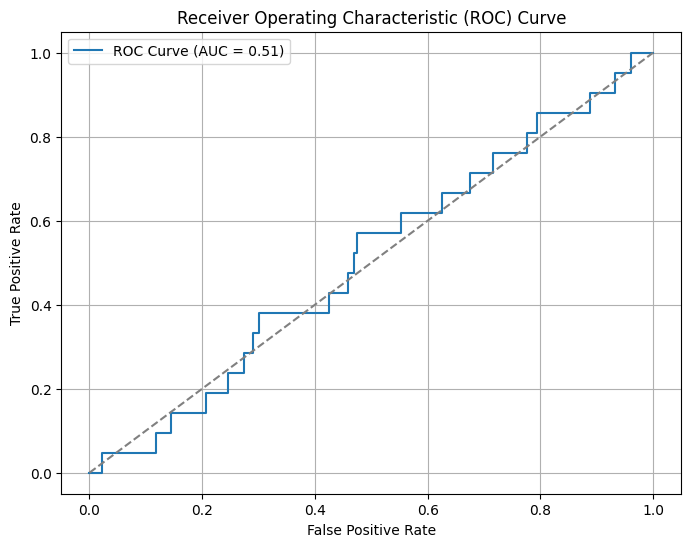

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
y_pred_proba = logistic_reg.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


This analysis allows us to understand how well the model performs in predicting the target disease, considering both the overall accuracy and the balance between sensitivity and specificity.

# Interpretability
Analyzing SHAP values provides insights into the importance of each feature in the model's predictions and helps explain why certain features are predictive of the target disease. The SHAP summary plot and force plot help interpret the model's behavior and provide explanations for individual predictions.

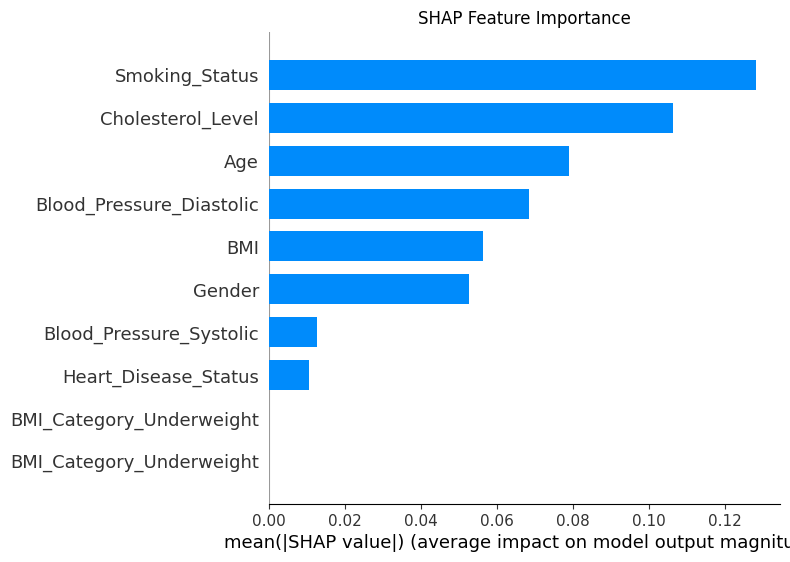

In [39]:
import shap


# Initialize SHAP explainer
explainer = shap.Explainer(logistic_reg, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('SHAP Feature Importance')
plt.show()



# Conclusion
In conclusion, the developed logistic regression model shows promise in predicting Diabetes based on patient data. The model's interpretability and accuracy make it a valuable tool for healthcare professionals, policymakers, and patients alike. Further research and validation with real-world patient data are recommended to enhance the model's robustness.

# References
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat


All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

MIT License

Copyright (c) 2024 ADUSUMILLIJ

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.